In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
#from tensorflow.keras.optimizers import Adam, Optimizer
import keras.backend as K
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping

path = 'data/X_train'
d =np.array(sorted(os.listdir(path))[:]).reshape(-1,5)
train_y = pd.read_csv('data/train_y_image.CSV')

index = np.array([d[i][0][8:-6] for i in range(len(d))]).astype(int)
train_y= train_y.T[index].T.values

img1_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][0]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img1_.append(img)

img2_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][1]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img2_.append(img)

img3_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][2]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img3_.append(img)

img4_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][3]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img4_.append(img)




img5_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][-1]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img5_.append(img)


image_train = np.expand_dims(np.concatenate([np.array([img1_]),np.array([img2_]),np.array([img3_]),np.array([img4_]),np.array([img5_])]),4)
image_train = image_train.reshape(331,5,448,448)

train_X_nimg = pd.read_csv('data/no_image_train_X.csv').iloc[:,1:]
train_X_nimg = train_X_nimg.T[index].T

path = 'data/X_test'
d =np.array(sorted(os.listdir(path))[:]).reshape(-1,5)
test_y = pd.read_csv('data/test_y_image.CSV')

index = np.array([d[i][0][7:-6] for i in range(len(d))]).astype(int)
test_y= test_y.T[index].T.values

img1_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][0]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img1_.append(img)

img2_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][1]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img2_.append(img)

img3_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][2]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img3_.append(img)

img4_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][3]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img4_.append(img)




img5_ =[]
for i in range(len(d)):
    img = Image.open(os.path.join(path,     d[i][-1]))
    img = img.resize((448,448))
    img =np.array(img)/255
    img =np.clip(img,np.mean(img),1)
    img5_.append(img)


image_test = np.expand_dims(np.concatenate([np.array([img1_]),np.array([img2_]),np.array([img3_]),np.array([img4_]),np.array([img5_])]),4)
image_test = image_test.reshape(126,5,448,448)
test_X_nimg = pd.read_csv('data/no_image_test_X.csv').iloc[:,1:]
test_X_nimg = test_X_nimg.T[index].T

2024-10-22 16:57:23.947053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 16:57:24.032090: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-22 16:57:24.032109: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-22 16:57:24.517948: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [13]:
image_train.shape,train_X_nimg.shape,train_y.shape

((331, 5, 448, 448), (331, 40), (331, 1))

In [15]:
from sklearn.model_selection import train_test_split

t1,v1,t2,v2,t3,v3= train_test_split(image_train,train_X_nimg,train_y)

In [20]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, multiply, Dense, Dropout, Flatten, GaussianNoise, AlphaDropout, ReLU, Conv2D, BatchNormalization
from keras.activations import selu


def CustomNet():
    image_input=Input((5,448,448),name='image_input')
    clinic_input=Input((40,),name='clinical_input')

################ clinical side

    co1=Dense(64,activation='selu',kernel_initializer='lecun_normal',bias_initializer='lecun_normal')(clinic_input)
    co1=AlphaDropout(0.1)(co1)

    co2=Dense(64,activation='selu',kernel_initializer='lecun_normal',bias_initializer='lecun_normal')(co1)
    co2=AlphaDropout(0.1)(co2)

    co3=Dense(128,activation='selu',kernel_initializer='lecun_normal',bias_initializer='lecun_normal')(co2)
    co3=AlphaDropout(0.1)(co3)

    co4=Dense(256,activation='selu',kernel_initializer='lecun_normal',bias_initializer='lecun_normal')(co3)
    co4=AlphaDropout(0.1)(co4)

    co5=Dense(256,activation='selu',kernel_initializer='lecun_normal',bias_initializer='lecun_normal')(co4)
    co5=AlphaDropout(0.1)(co5)

############### image side

    output=Conv2D(64, (3, 3), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=122))(image_input)
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

    output=Conv2D(64, (3, 3), strides=(2,2), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=123))(output)
    output=multiply([output,co1])
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

##############
    output=Conv2D(64, (3, 3), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=124))(output)
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

    output=Conv2D(64, (3, 3), strides=(2,2),padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=125))(output)
    output=multiply([output,co2])
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

##############
    output=Conv2D(128, (3,3), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=126))(output)
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

    output=Conv2D(128, (3, 3), strides=(2,2), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=127))(output)
    output=multiply([output,co3])
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)
############
    output=Conv2D(256, (3, 3), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=129))(output)
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

    output=Conv2D(256, (3, 3), strides=(2,2), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=130))(output)
    output=multiply([output,co4])
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)
#############
    output=Conv2D(256, (3, 3), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=132))(output)
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)

    output=Conv2D(256, (3, 3), strides=(2,2), padding='same',use_bias=False,kernel_initializer=keras.initializers.he_normal(seed=133))(output)
    output=multiply([output,co5])
    output=BatchNormalization(axis=-1,center=False)(output)
    output=ReLU()(output)
##############

    output=Flatten()(output)
    output=Dense(4096)(output)
    output=ReLU()(output)


    output=Dense(512)(output)
    output=ReLU()(output)
    output=Dense(64)(output)
    output=ReLU()(output)


    output=Dense(1,activation='sigmoid')(output)
    #output=Activation('softmax')(output)

    model=Model(inputs=[image_input,clinic_input],outputs=output)
    optimizer = Adam(learning_rate=0.00005)
    model.compile(optimizer=optimizer , loss='binary_crossentropy', metrics=['accuracy'])
    return model 


In [24]:
d= CustomNet()
esp = EarlyStopping(monitor = 'val_loss',patience = 10 , restore_best_weights=True)
history =d.fit([t1,t2],t3,epochs=100,batch_size=16,validation_data= ([v1,v2],v3),verbose=1,callbacks=[esp])

Epoch 1/100
16/16 [==============================] - 11s 535ms/step - loss: 0.4205 - accuracy: 0.8952 - val_loss: 0.6863 - val_accuracy: 0.9036
Epoch 2/100
16/16 [==============================] - 8s 470ms/step - loss: 0.3832 - accuracy: 0.8952 - val_loss: 0.6598 - val_accuracy: 0.9036
Epoch 3/100
16/16 [==============================] - 8s 531ms/step - loss: 0.3594 - accuracy: 0.8952 - val_loss: 0.6496 - val_accuracy: 0.9036
Epoch 4/100
16/16 [==============================] - 8s 512ms/step - loss: 0.4080 - accuracy: 0.8952 - val_loss: 0.6187 - val_accuracy: 0.9036
Epoch 5/100
16/16 [==============================] - 7s 461ms/step - loss: 0.3715 - accuracy: 0.8952 - val_loss: 0.5879 - val_accuracy: 0.9036
Epoch 6/100
16/16 [==============================] - 8s 534ms/step - loss: 0.3463 - accuracy: 0.8952 - val_loss: 0.5852 - val_accuracy: 0.9036
Epoch 7/100
16/16 [==============================] - 8s 475ms/step - loss: 0.3554 - accuracy: 0.8952 - val_loss: 0.5564 - val_accuracy: 0.903

In [25]:
pred=d.predict([image_test,test_X_nimg])

4/4 [==============================] - 1s 98ms/step


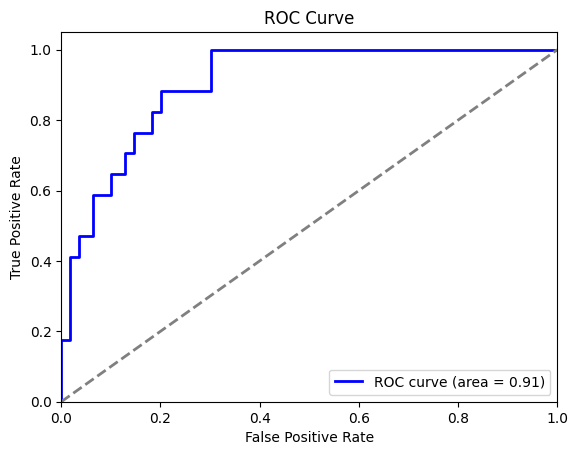

In [26]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(test_y, pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
loss, accuracy = d.evaluate([image_test,test_X_nimg], test_y)
print('테스트 정확도:', accuracy)

# 또는 예측값을 사용하여 직접 정분류율 계산
y_pred =d.predict([image_test,test_X_nimg])
y_pred_labels = (y_pred > 0.5).astype(int)  # 임계값 0.5를 기준으로 클래스 분류

acc = accuracy_score(test_y, y_pred_labels)
print('테스트 정확도 (직접 계산):', acc)

4/4 [==============================] - 1s 115ms/step - loss: 0.2489 - accuracy: 0.8889
테스트 정확도: 0.8888888955116272
4/4 [==============================] - 0s 103ms/step
테스트 정확도 (직접 계산): 0.8888888888888888


4/4 [==============================] - 0s 83ms/step
혼동 행렬:
[[105   4]
 [ 10   7]]


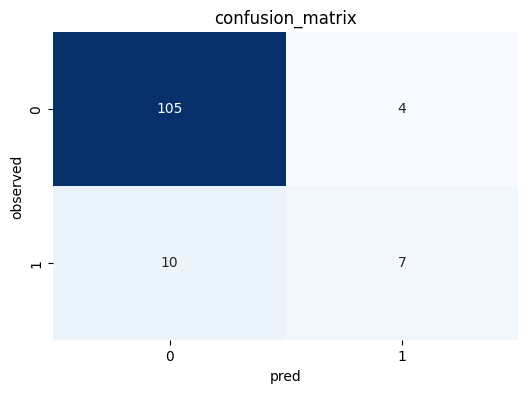

분류 보고서:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       109
           1       0.64      0.41      0.50        17

    accuracy                           0.89       126
   macro avg       0.77      0.69      0.72       126
weighted avg       0.88      0.89      0.88       126



In [42]:
# 필요한 라이브러리 임포트
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 데이터에 대한 예측값 생성
y_pred_prob = d.predict([image_test,test_X_nimg])
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # 임계값 0.5를 기준으로 이진 분류

# 실제 레이블
y_true = test_y

# 혼동 행렬 계산
cm = confusion_matrix(y_true, y_pred)

# 혼동 행렬 출력
print('혼동 행렬:')
print(cm)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('pred')
plt.ylabel('observed')
plt.title('confusion_matrix')
plt.show()

# 분류 보고서 출력
print('분류 보고서:')
print(classification_report(y_true, y_pred))
